<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Load-the-libraries" data-toc-modified-id="Load-the-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load the libraries</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Data-Processing" data-toc-modified-id="Data-Processing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Processing</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Train-validation-split" data-toc-modified-id="Train-validation-split-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Train validation split</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Pycaret" data-toc-modified-id="Pycaret-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Pycaret</a></span></li></ul></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Model-Interpretation" data-toc-modified-id="Model-Interpretation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Interpretation</a></span></li><li><span><a href="#Save-the-model" data-toc-modified-id="Save-the-model-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Save the model</a></span></li><li><span><a href="#Predictions" data-toc-modified-id="Predictions-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Predictions</a></span></li></ul></div>

# Description
Reference: https://datahack.analyticsvidhya.com/contest/all/  


**Predict Loan Eligibility for Dream Housing Finance company**
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

**Data Dictionary**
Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

| Variable | Description |
| :---|:---|
| Loan_ID | Unique Loan ID |
| Gender | Male/ Female |
| Married | Applicant married (Y/N) |
| Dependents | Number of dependents |
| Education | Applicant Education (Graduate/ Under Graduate) |
| Self_Employed | Self employed (Y/N) |
| ApplicantIncome | Applicant income |
| CoapplicantIncome | Coapplicant income |
| LoanAmount | Loan amount in thousands |
| Loan_Amount_Term | Term of loan in months |
| Credit_History | credit history meets guidelines |
| Property_Area | Urban/ Semi Urban/ Rural |
| Loan_Status | (Target) Loan approved (Y/N) |


**Evaluation Metric**  
Your model performance will be evaluated on the basis of your prediction of loan status for the test data (test.csv), which contains similar data-points as train except for the loan status to be predicted. Your submission needs to be in the format as shown in sample submission.

We at our end, have the actual loan status for the test dataset, against which your predictions will be evaluated. We will use the Accuracy value to judge your response.



**Public and Private Split**   
Test file is further divided into Public (25%) and Private (75%)

Your initial responses will be checked and scored on the Public data.
The final rankings would be based on your private score which will be published once the competition is over.

# Load the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

pd.options.plotting.backend = "matplotlib"
pd.set_option('max_columns',100)

import time,os,json
time_start_notebook = time.time()
home = os.path.expanduser('~')
SEED=100

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

[(x.__name__,x.__version__) for x in [np,pd,sns]]

[('numpy', '1.18.4'), ('pandas', '1.0.4'), ('seaborn', '0.10.1')]

In [2]:
import sklearn
import xgboost as xgb

# Load the data

In [3]:
df_train = pd.read_csv('../data/raw/train.csv')
print(df_train.shape)
df_train.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_test = pd.read_csv('../data/raw/test.csv')
print(df_test.shape)
df_test.head()

(367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Data Processing

In [5]:
def clean_data(df):
    df = df.copy()
    # drop unwanted features
    df = df.drop('Loan_ID',axis=1)

    # missing values imputation
    ## fill married yes no from graudated or not
    cond = (df['Education']=='Graduate') & (df['Married'].isnull()) 
    df.loc[cond, 'Married'] = 'Yes'
    cond = (df['Education']!='Graduate') & (df['Married'].isnull()) 
    df.loc[cond, 'Married'] = 'No'

    ## fill with mode
    cols_mode = ['Gender', 'Dependents', 'Self_Employed', 'Credit_History']
    for c in cols_mode:
        df[c] = df[c].fillna(df[c].mode()[0])

    ## fill with mean
    cols_mean = ['LoanAmount','Loan_Amount_Term' ]
    for c in cols_mean:
        df[c] = df[c].fillna(df[c].mean())

    # mapping string to integers
    df['Gender'] = df['Gender'].map({'Male':1, 'Female': 0})
    df['Married'] = df['Married'].map({'Yes':1, 'No': 0 })
    df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
    df['Self_Employed'] = df['Self_Employed'].map({'Yes':1, 'No': 0})
    
    # target 
    target = 'Loan_Status'
    if target in df.columns:
        df[target] = df[target].map({'Y':1, 'N': 0})

    # one hot encoding
    cols = ['Dependents','Property_Area']
    df = pd.get_dummies(df,columns=cols,drop_first=True)
    return df

In [6]:
df_train_raw = pd.read_csv('../data/raw/train.csv')
df_test_raw = pd.read_csv('../data/raw/test.csv')

df_train = clean_data(df_train_raw)
df_test = clean_data(df_test_raw)

print(df_train.shape)
print(df_test.shape)
df_train.head(2).append(df_train.tail(2))

(614, 15)
(367, 14)


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,0,0
612,1,1,1,0,7583,0.0,187.000000,360.0,1.0,1,0,1,0,0,1
613,0,0,1,1,4583,0.0,133.000000,360.0,0.0,0,0,0,0,1,0


# Modelling

## Train validation split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_train_orig = df_train.copy()
target = 'Loan_Status'
df_Xtrain, df_Xvalid, ser_ytrain, ser_yvalid = train_test_split(
    df_train_orig.drop(target,axis=1), df_train_orig[target],
    test_size = 0.2,
    random_state=SEED,
    stratify=df_train_orig[target]
)

ytrain = ser_ytrain.to_numpy().ravel()
yvalid = ser_yvalid.to_numpy().ravel()

print(f'train shape: {df_Xtrain.shape}')
print(f'valid shape: {df_Xvalid.shape}')

df_Xtrain.head(2)

train shape: (491, 14)
valid shape: (123, 14)


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
203,1,1,0,0,3500,1083.0,135.0,360.0,1.0,1,0,0,0,1
369,1,1,1,0,19730,5266.0,570.0,360.0,1.0,0,0,0,0,0


In [9]:
df_train_raw, df_valid_raw = train_test_split(
    df_train_raw,
    test_size = 0.2,
    random_state=SEED,
    stratify=df_train_orig[target]
)


df_train_raw.shape

(491, 13)

In [10]:
df_eval = pd.DataFrame({
    'Model': [],
    'Description': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F-score': []
})

# Modelling

## Pycaret

In [11]:
import pycaret
from pycaret.utils import version
version()

2.0


In [12]:
from pycaret import classification

In [13]:
classification_setup = classification.setup(data= df_train,
                                            target='Loan_Status')

Setup Succesfully Completed!


,Description,Value
0,session_id,7348
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(614, 15)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [14]:
# compare performance of different classification models
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Naive Bayes,0.8089,0.7447,0.9661,0.7989,0.8740,0.4929,0.5406,0.0039
1,Ridge Classifier,0.8089,0.0000,0.9797,0.7926,0.8758,0.4808,0.5404,0.0048
2,Linear Discriminant Analysis,0.8089,0.7685,0.9797,0.7926,0.8758,0.4808,0.5404,0.0049
3,Logistic Regression,0.8066,0.7726,0.9662,0.7973,0.8730,0.4832,0.5309,0.0252
4,CatBoost Classifier,0.7810,0.7463,0.9222,0.7937,0.8524,0.4360,0.4613,0.9866
5,Extreme Gradient Boosting,0.7739,0.7543,0.9186,0.7880,0.8475,0.4174,0.4452,0.0412
6,Light Gradient Boosting Machine,0.7622,0.7577,0.8848,0.7933,0.8357,0.4075,0.4215,0.0368
7,Gradient Boosting Classifier,0.7599,0.7247,0.9053,0.7818,0.8382,0.3823,0.4049,0.0742
8,Ada Boost Classifier,0.7530,0.7034,0.8952,0.7796,0.8314,0.3718,0.4011,0.0647
9,Extra Trees Classifier,0.7508,0.7372,0.8680,0.7906,0.8261,0.3865,0.3989,0.1466


GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
# build the xgboost model
model_xgb = classification.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8372,0.7769,0.9667,0.8286,0.8923,0.5669,0.5961
1,0.7674,0.8051,0.8667,0.8125,0.8387,0.4236,0.4264
2,0.7674,0.5974,0.9333,0.7778,0.8485,0.3658,0.3955
3,0.8372,0.8692,0.9333,0.8485,0.8889,0.5871,0.5965
4,0.7674,0.8231,0.9000,0.7941,0.8438,0.3961,0.4082
5,0.8140,0.6823,0.9655,0.8000,0.8750,0.5235,0.5606
6,0.7907,0.8645,1.0000,0.7632,0.8657,0.4284,0.5221
7,0.6977,0.6675,0.8621,0.7353,0.7937,0.2415,0.2525
8,0.6744,0.6404,0.7931,0.7419,0.7667,0.2302,0.2316
9,0.7857,0.8170,0.9655,0.7778,0.8615,0.4112,0.4626


In [16]:
model_xgb_tuned = pycaret.classification.tune_model(model_xgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8372,0.7564,0.9667,0.8286,0.8923,0.5669,0.5961
1,0.7674,0.7872,0.8000,0.8571,0.8276,0.4717,0.4744
2,0.7442,0.6282,0.9000,0.7714,0.8308,0.3194,0.3359
3,0.8605,0.8359,0.9333,0.8750,0.9032,0.6542,0.6585
4,0.7674,0.8051,0.9000,0.7941,0.8438,0.3961,0.4082
5,0.8140,0.7069,0.9655,0.8000,0.8750,0.5235,0.5606
6,0.7674,0.8916,0.9310,0.7714,0.8438,0.4044,0.4330
7,0.7442,0.6749,0.8966,0.7647,0.8254,0.3582,0.3745
8,0.6744,0.6305,0.7586,0.7586,0.7586,0.2586,0.2586
9,0.8333,0.8117,1.0000,0.8056,0.8923,0.5421,0.6097


In [17]:
params = {
    "max_depth": np.random.randint(1, (len(df_train.columns)*.85),20)
          }


model_xgb = pycaret.classification.tune_model(model_xgb,custom_grid=params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8140,0.7936,0.9667,0.8056,0.8788,0.4926,0.5327
1,0.8605,0.7910,1.0000,0.8333,0.9091,0.6195,0.6699
2,0.8140,0.6218,1.0000,0.7895,0.8824,0.4658,0.5510
3,0.8837,0.9128,1.0000,0.8571,0.9231,0.6906,0.7263
4,0.7907,0.8333,0.9333,0.8000,0.8615,0.4432,0.4660
5,0.7907,0.7328,1.0000,0.7632,0.8657,0.4284,0.5221
6,0.7674,0.7709,1.0000,0.7436,0.8529,0.3505,0.4609
7,0.7442,0.7069,0.9310,0.7500,0.8308,0.3310,0.3658
8,0.7907,0.6502,0.9655,0.7778,0.8615,0.4526,0.5002
9,0.8095,0.7905,1.0000,0.7838,0.8788,0.4633,0.5490


In [18]:
print(model_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=7348,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)


# Model Evaluation

In [19]:
# evaluate model
classification.evaluate_model(model_xgb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Model Interpretation

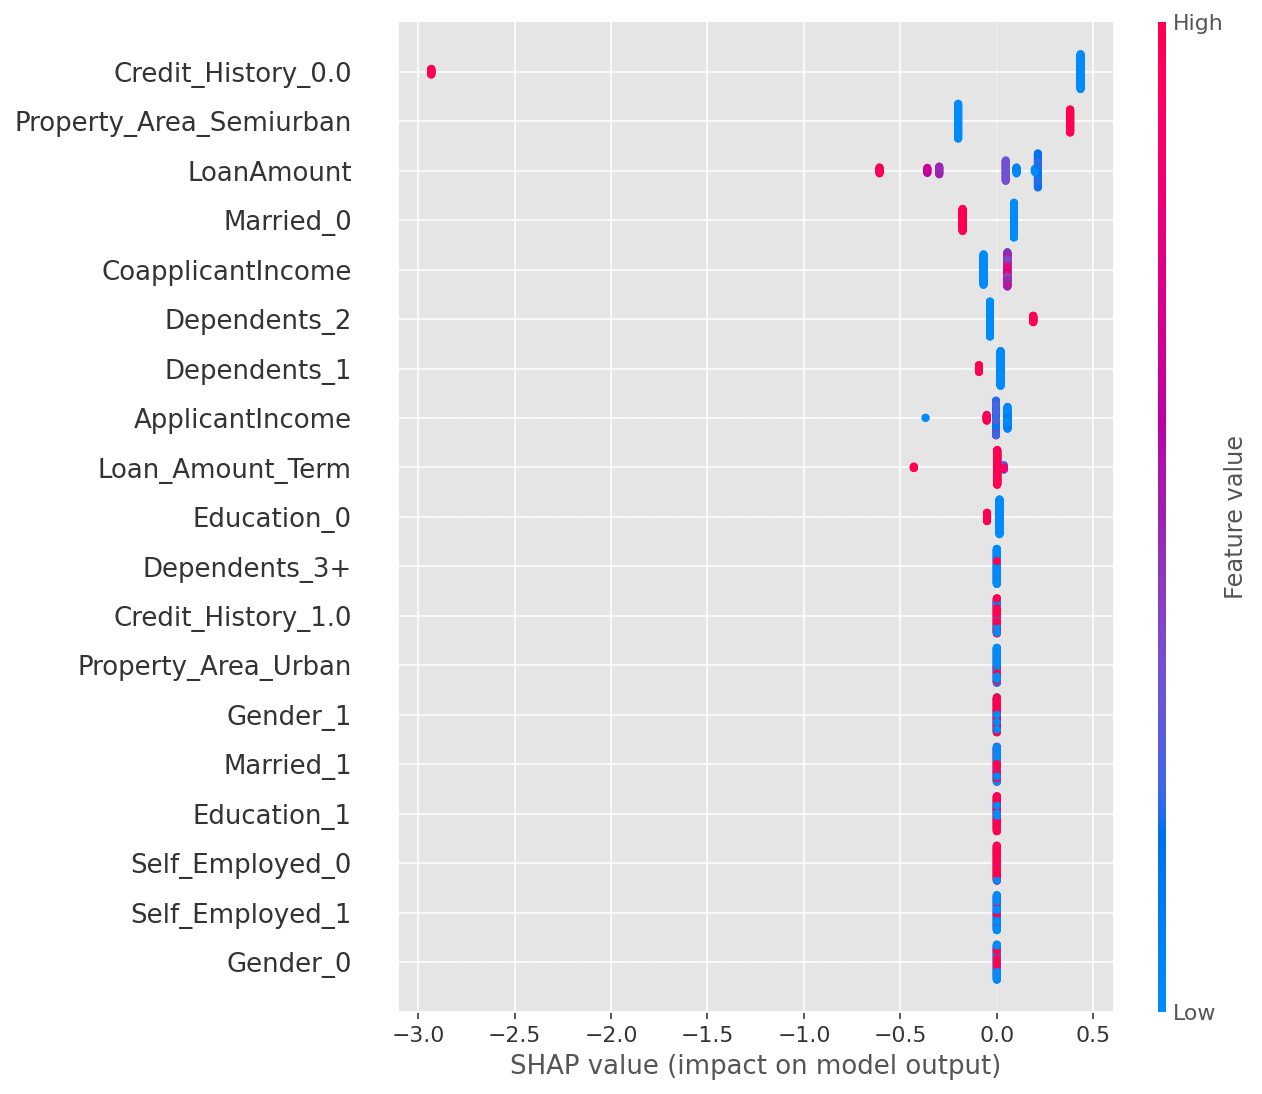

In [20]:
# interpret_model: SHAP
classification.interpret_model(model_xgb)

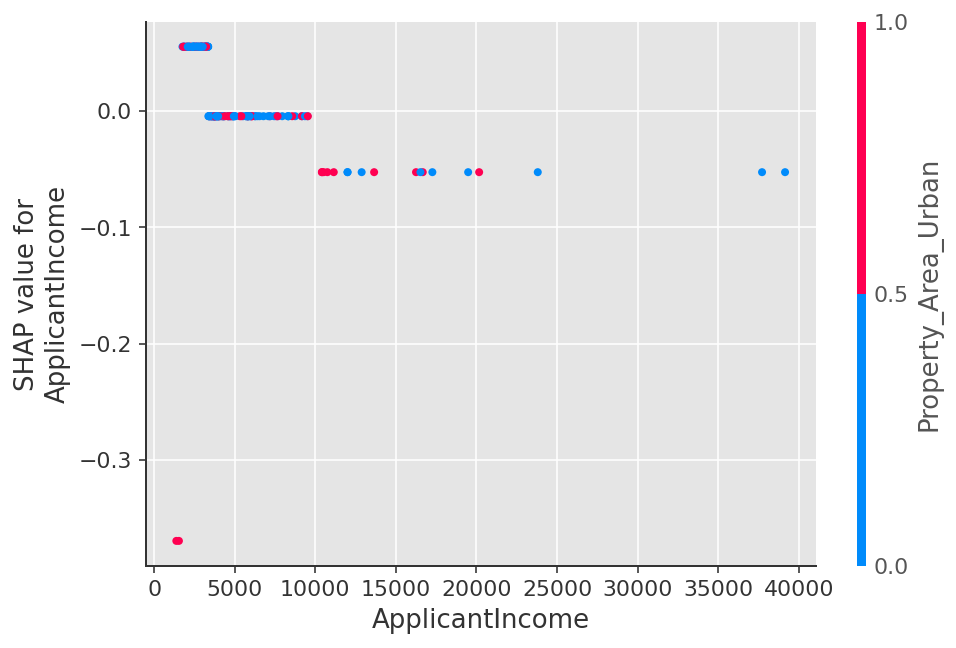

In [21]:
# interpret model : Correlation
classification.interpret_model(model_xgb,plot='correlation')

# Save the model

In [22]:
# save the model
classification.save_model(model_xgb, 'xgb')

Transformation Pipeline and Model Succesfully Saved


In [23]:
!ls

a01_loan_prediction_eda.ipynb     b99_loan_prediction_all.ipynb     html                              z02_sumbission.ipynb
b01_loan_prediction_xgb.ipynb     c01_loan_logreg_tuning.ipynb      logs.log
b02_loan_prediction_lgb.ipynb     c01_loan_prediction_tpot.ipynb    xgb.pkl
b03_loan_prediction_pycaret.ipynb catboost_info                     z01_feature_selection.ipynb


In [24]:
# load model
model_xgb = classification.load_model(model_name='xgb')

Transformation Pipeline and Model Sucessfully Loaded


# Predictions

In [25]:
from sklearn import metrics

In [26]:
yvd = yvalid

yvd[:5]

array([0, 0, 1, 1, 1])

In [28]:
# make predictions
df_vd_preds = classification.predict_model(model_xgb, data=df_Xvalid)

# view the predictions
df_vd_preds.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,Label,Score
0,0,0,1,0,2600,0.0,160.0,360.0,1.0,1,0,0,0,1,1,0.6993
1,1,0,1,0,8750,4167.0,308.0,360.0,1.0,0,0,0,0,0,1,0.5904
2,0,0,0,0,2165,0.0,70.0,360.0,1.0,0,0,0,1,0,1,0.8217
3,1,1,1,0,2383,3334.0,172.0,360.0,1.0,0,0,0,1,0,1,0.8295
4,1,1,1,0,16692,0.0,110.0,360.0,1.0,0,0,0,1,0,1,0.8655


In [29]:
vd_preds = np.array(df_vd_preds['Label'])
vd_preds[:5]

array([1, 1, 1, 1, 1])

In [30]:
acc = metrics.accuracy_score(yvd, vd_preds)
pre = metrics.precision_score(yvd, vd_preds)
rec = metrics.recall_score(yvd, vd_preds)
f1  = metrics.f1_score(yvd,vd_preds)


row = ['xgb', 'xgb9.0', acc, pre, rec, f1]
df_eval.loc[len(df_eval)] = row
df_eval = df_eval.drop_duplicates(['Model','Description'])
df_eval.sort_values('Accuracy',ascending=False).reset_index().style.background_gradient(subset=['Accuracy'])

,index,Model,Description,Accuracy,Precision,Recall,F-score
0,0,xgb,xgb9.0,0.813008,0.792453,0.988235,0.879581
